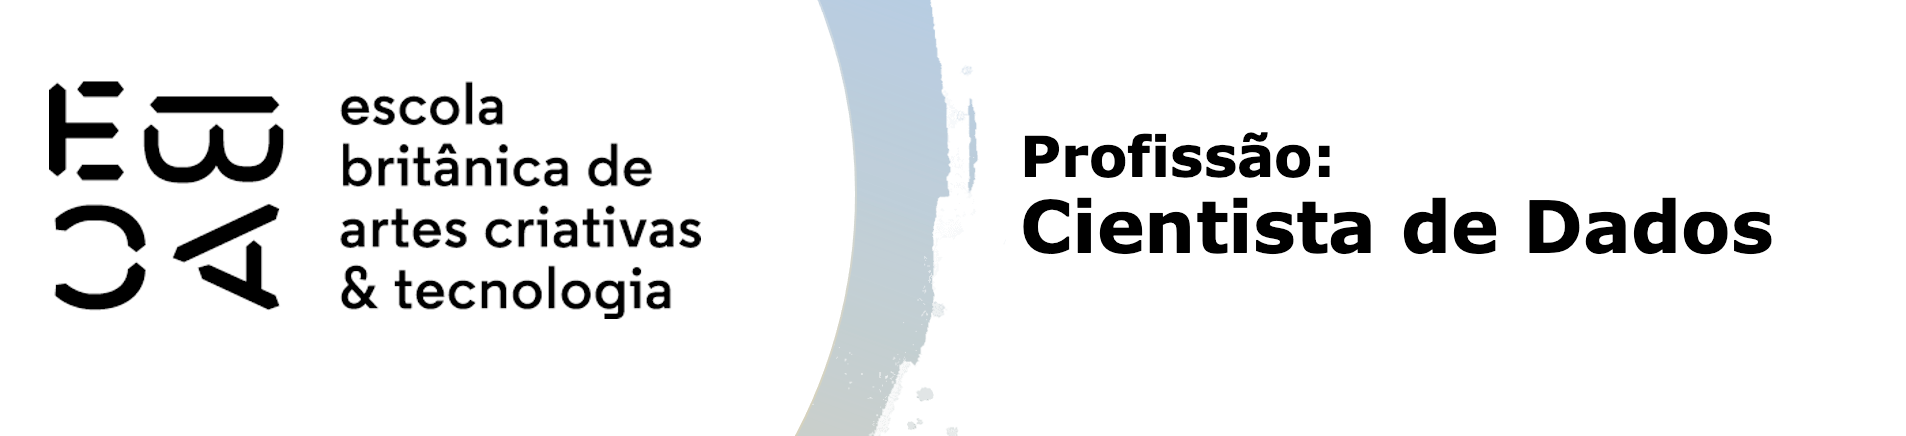

# Regressão III - Tarefa

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import r2_score

In [162]:
df = pd.read_csv('previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


In [79]:
df.shape

(750000, 13)

## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [163]:
#verificar valores faltantes 
df.isnull().sum()

index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125760
qt_pessoas_residencia         0
renda                         0
dtype: int64

In [164]:
#substituir valores faltantes pela média da coluna
df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace=True)

#verificando se valores ausentes foram substituídos
df.isnull().sum() 

/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_14530/1000947486.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tempo_emprego'].fillna(df['tempo_emprego'].mean(), inplace=True)


index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [165]:
#transformando a data (index) em coluna
df = df.reset_index()
df.dtypes

data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
renda                    float64
dtype: object

In [166]:
#mudando tipo dos dados da coluna data
df['data_ref'] = pd.to_datetime(df['data_ref'])
df.dtypes

data_ref                 datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                 object
posse_de_imovel                  object
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
renda                           float64
dtype: object

In [167]:
#verificando última data
df['data_ref'].max()

Timestamp('2016-03-01 00:00:00')

In [168]:
#separar base teste
base_teste = df.loc[df['data_ref'] > '2015-11-30']

print(f''' 
    Data mínima na base_teste: {base_teste['data_ref'].min()}.
    Data máxima na base_teste: {base_teste['data_ref'].max()}.
    ''') 

 
    Data mínima na base_teste: 2015-12-01 00:00:00.
    Data máxima na base_teste: 2016-03-01 00:00:00.
    


In [169]:
base_teste.shape

(200000, 14)

In [170]:
#separar base treino
base_treino = df.loc[df['data_ref'] <= '2015-11-30']

print(f''' 
    Data mínima na base_treino: {base_treino['data_ref'].min()}.
    Data máxima na base_treino: {base_treino['data_ref'].max()}.
    ''') 

 
    Data mínima na base_treino: 2015-01-01 00:00:00.
    Data máxima na base_treino: 2015-11-01 00:00:00.
    


In [171]:
base_treino.shape

(550000, 14)

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [188]:
#construindo modelo de regressão utilizando a base de treino
reg = smf.ols('renda ~ tempo_emprego', data=base_treino).fit()

In [189]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        18:57:30   Log-Likelihood:            -7.0559e+06
No. Observations:              550000   AIC:                         1.411e+07
Df Residuals:                  549998   BIC:                         1.411e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.522e+04    196.594   -179.133      0.000   -3.56e+04   -3.48e+04
tempo_emprego  8355.1880     19.930    419.221      0.000    8316.125    8394.251
==============================================================================
Omnibus:                  1292469.762   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      23429026496.436
Skew:                          23.394   Prob(JB):                         0.00
Kurtosis:                    1013.034   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
print(f'R-quadrado ajustado: {reg.rsquared_adj:.2}')

R-quadrado ajustado: 0.24


### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [175]:
#categorizar a variável tempo_emprego
base_treino['tempo_emprego_cat'], quebras = pd.qcut(base_treino.tempo_emprego, 20, duplicates='drop', retbins=True)

/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_14530/1635224950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_treino['tempo_emprego_cat'], quebras = pd.qcut(base_treino.tempo_emprego, 20, duplicates='drop', retbins=True)


In [176]:
#criar dataframe para armazenar dados
perfil = pd.DataFrame()

#cada linha é uma categoria
perfil['tempo_emprego_cat'] = base_treino['tempo_emprego_cat'].unique()

#coluna para a quantidade de observações de cada categoria
perfil['qtd_obs'] = base_treino.groupby('tempo_emprego_cat')['tempo_emprego_cat'].count()

#coluna para a média do log-renda para cada categoria
base_treino['log_renda'] = np.log(base_treino['renda'])
perfil['media_log_renda'] = base_treino.groupby('tempo_emprego_cat')['log_renda'].mean()

#coluna para a média do tempo de emprego para cada categoria
perfil['media_tempo_emprego'] = base_treino.groupby('tempo_emprego_cat')['tempo_emprego'].mean()

/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_14530/3282525410.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perfil['qtd_obs'] = base_treino.groupby('tempo_emprego_cat')['tempo_emprego_cat'].count()
/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_14530/3282525410.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_treino['log_renda'] = np.log(base_treino['renda'])
/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_14530/3282525410.py:12: FutureWarning: The default of observed=False is deprecated and will be changed

In [177]:
perfil

,tempo_emprego_cat,qtd_obs,media_log_renda,media_tempo_emprego
0,"(15.219, 20.274]",NaN,NaN,NaN
1,"(9.09, 10.438]",27543.0,8.515460,1.124968
2,"(8.107, 9.09]",27315.0,8.629500,1.781155
3,"(0.816, 1.458]",27854.0,8.817479,3.301011
4,"(7.471, 7.746]",27296.0,8.913815,3.989400
5,"(6.622, 7.471]",27493.0,9.110178,5.367651
6,"(5.759, 6.622]",27474.0,9.201152,6.206258
7,"(12.474, 15.219]",27463.0,9.284249,7.009258
8,"(2.096, 2.912]",9935.0,9.426133,7.930416
9,"(10.438, 12.474]",27264.0,9.490674,8.573645


Text(0.5, 1.0, 'Média do tempo de emprego X Média do log de renda')

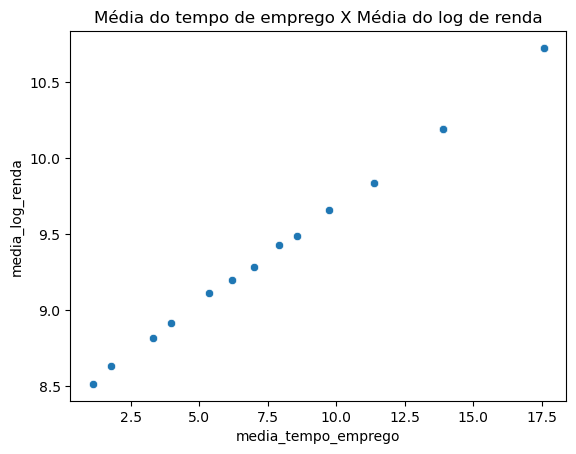

In [178]:
#gráfico da média do tempo de emprego pela média do log-renda
sns.scatterplot(perfil, x='media_tempo_emprego', y='media_log_renda')

plt.title('Média do tempo de emprego X Média do log de renda')

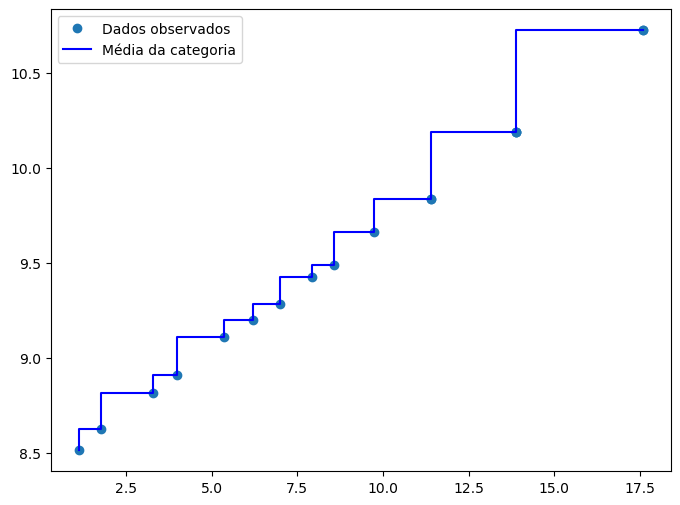

In [179]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(perfil.media_tempo_emprego, perfil.media_log_renda, "o", label="Dados observados", alpha=1)
ax.step(perfil.media_tempo_emprego, perfil.media_log_renda, "b-", label="Média da categoria", alpha=1)
ax.legend()

Considerando que já houve transformação (em x: categorização de `tempo_emprego`; e em y: tranformação em log de `renda`), os dados parecem ter uma boa linearidade.

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


#### CATEGORIZAÇÃO DE X

In [192]:
#usar categorização de tempo_emprego
#construindo modelo de regressão utilizando a base de treino com tempo_emprego categorizada e log_renda
reg1 = smf.ols('log_renda ~ tempo_emprego_cat', data=base_treino).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                 2.331e+04
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        18:58:39   Log-Likelihood:            -7.3739e+05
No. Observations:              550000   AIC:                         1.475e+06
Df Residuals:                  549982   BIC:                         1.475e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         8.4248      0.006   1516.929      0.000       8.414       8.436
tempo_emprego_cat[T.Interval(0.816, 1.458, closed='right')]       0.0907      0.008     11.526      0.000       0.075       0.106
tempo_emprego_cat[T.Interval(1.458, 2.096, closed='right')]       0.2047      0.008     25.968      0.000       0.189       0.220
tempo_emprego_cat[T.Interval(2.096, 2.912, closed='right')]       0.2605      0.008     33.089      0.000       0.245       0.276
tempo_emprego_cat[T.Interval(2.912, 3.636, closed='right')]       0.3927      0.008     50.056      0.000       0.377       0.408
tempo_emprego_cat[T.Interval(3.636, 4.301, closed='right')]       0.4890      0.008     62.020      0.000       0.474       0.504
tempo_emprego_cat[T.Interval(4.301, 4.934, closed='right')]       0.5441      0.008     69.097      0.000       0.529       0.560
tempo_emprego_cat[T.Interval(4.934, 5.759, closed='right')]       0.6854      0.008     87.081      0.000       0.670       0.701
tempo_emprego_cat[T.Interval(5.759, 6.622, closed='right')]       0.7764      0.008     98.622      0.000       0.761       0.792
tempo_emprego_cat[T.Interval(6.622, 7.471, closed='right')]       0.8595      0.008    109.166      0.000       0.844       0.875
tempo_emprego_cat[T.Interval(7.471, 7.746, closed='right')]       0.6882      0.006    109.682      0.000       0.676       0.701
tempo_emprego_cat[T.Interval(7.746, 8.107, closed='right')]       1.0014      0.011     92.606      0.000       0.980       1.023
tempo_emprego_cat[T.Interval(8.107, 9.09, closed='right')]        1.0659      0.008    135.138      0.000       1.050       1.081
tempo_emprego_cat[T.Interval(9.09, 10.438, closed='right')]       1.2372      0.008    157.282      0.000       1.222       1.253
tempo_emprego_cat[T.Interval(10.438, 12.474, closed='right')]     1.4111      0.008    179.300      0.000       1.396       1.427
tempo_emprego_cat[T.Interval(12.474, 15.219, closed='right')]     1.7662      0.008    224.669      0.000       1.751       1.782
tempo_emprego_cat[T.Interval(15.219, 20.274, closed='right')]     2.3013      0.008    292.050      0.000       2.286       2.317
tempo_emprego_cat[T.Interval(20.274, 42.907, closed='right')]     3.3674      0.008    427.567      0.000       3.352       3.383
==============================================================================
Omnibus:                      642.328   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              631.940
Skew:                          -0.073   Prob(JB):                    5.97e-138
Kurtosis:                       2.922

In [182]:
print(f'R-quadrado ajustado: {reg1.rsquared_adj:.2}')

R-quadrado ajustado: 0.42


> R-quadrado ajustado foi de 0.24 para 0.42 com a categorização de `tempo_emprego`.

#### TRANSFORMAÇÃO DE X

In [198]:
#transformar tempo_emprego em polinômio
reg2 = smf.ols(' log_renda ~ I(np.log(tempo_emprego+10))', data=base_treino).fit()

print(f'R-quadrado ajustado: {reg2.rsquared_adj:.2}')

R-quadrado ajustado: 0.4


#### REGRESSÃO SEGMENTADA

In [199]:
C1=20

base_treino['X1_1'] = (base_treino.tempo_emprego<=C1)*base_treino.tempo_emprego + (base_treino.tempo_emprego>C1)*C1
base_treino['X1_2'] = (base_treino.tempo_emprego<=C1)*0 + (base_treino.tempo_emprego>C1)*(base_treino.tempo_emprego-C1)

reg3 = smf.ols('log_renda ~ X1_1 + X1_2', data=base_treino).fit()

print(f'R-quadrado ajustado: {reg3.rsquared_adj:.2}')

R-quadrado ajustado: 0.42


/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_14530/2485893209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_treino['X1_1'] = (base_treino.tempo_emprego<=C1)*base_treino.tempo_emprego + (base_treino.tempo_emprego>C1)*C1
/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_14530/2485893209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_treino['X1_2'] = (base_treino.tempo_emprego<=C1)*0 + (base_treino.tempo_emprego>C1)*(base_treino.tempo_emprego-C1)


### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [200]:
#ajustando base de teste
base_teste['tempo_emprego_cat'] = pd.cut(base_teste['tempo_emprego'], quebras)

base_teste['log_renda'] = np.log(base_teste['renda'])

base_teste['X1_1'] = (base_teste.tempo_emprego<=C1)*base_teste.tempo_emprego + (base_teste.tempo_emprego>C1)*C1
base_teste['X1_2'] = (base_teste.tempo_emprego<=C1)*0 + (base_teste.tempo_emprego>C1)*(base_teste.tempo_emprego-C1)

base_teste.head()

/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_14530/251470030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_teste['tempo_emprego_cat'] = pd.cut(base_teste['tempo_emprego'], quebras)
/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_14530/251470030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_teste['log_renda'] = np.log(base_teste['renda'])
/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_14530/251470030.py:6: SettingWithCopyWarning: 
A value is trying t

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,tempo_emprego_cat,log_renda,X1_1,X1_2
550000,2015-12-01,14180,F,S,N,0,Assalariado,Superior completo,Casado,Casa,56,20.887671,2.0,28655.39,"(20.274, 42.907]",10.263097,20.000000,0.887671
550001,2015-12-01,14159,F,S,N,0,Assalariado,Superior completo,Casado,Casa,28,9.460274,2.0,3241.54,"(9.09, 10.438]",8.083804,9.460274,0.000000
550002,2015-12-01,4366,M,S,S,3,Assalariado,Médio,Casado,Casa,38,2.257534,5.0,1587.26,"(2.096, 2.912]",7.369765,2.257534,0.000000
550003,2015-12-01,3799,F,S,S,0,Pensionista,Médio,Casado,Casa,61,7.746165,2.0,3406.36,"(7.471, 7.746]",8.133400,7.746165,0.000000
550004,2015-12-01,9437,F,N,N,0,Assalariado,Médio,Casado,Casa,51,9.936986,2.0,6323.71,"(9.09, 10.438]",8.752061,9.936986,0.000000


In [209]:
#TRANSFORMAÇÃO DE X

y_pred2 = reg2.predict(base_teste)
base_teste['pred2'] = y_pred2

r = base_teste[['pred2', 'log_renda']].corr().iloc[0,1]
r2 = r**2

print(f'R-quadrado: {r2:.2}')

R-quadrado: 0.47


/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_14530/998741251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_teste['pred2'] = y_pred2


In [212]:
#REGRESSÃO SEGMENTADA

y_pred3 = reg3.predict(base_teste)
base_teste['pred3'] = y_pred3

r = base_teste[['pred3', 'log_renda']].corr().iloc[0,1]
r2 = r**2

print(f'R-quadrado: {r2:.2}')

R-quadrado: 0.5


/var/folders/wh/n65332rj7vx8p0vjpl2bjx8h0000gn/T/ipykernel_14530/4073102389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_teste['pred3'] = y_pred3
